In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /home/octavian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/octavian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/octavian/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data = pd.read_csv('fake_reviews_dataset.csv')
data['word_count'] = data['text_'].apply(lambda x: len(x.split()))
data.head()

,category,rating,label,text_,word_count
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",12
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",16
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,14
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",17
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,18


In [4]:
data.shape

(40432, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    40432 non-null  object 
 1   rating      40432 non-null  float64
 2   label       40432 non-null  object 
 3   text_       40432 non-null  object 
 4   word_count  40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [6]:
data.describe()

,rating,word_count
count,40432.000000,40432.000000
mean,4.256579,67.465423
std,1.144354,69.581333
min,1.000000,1.000000
25%,4.000000,21.000000
50%,5.000000,39.000000
75%,5.000000,85.000000
max,5.000000,373.000000


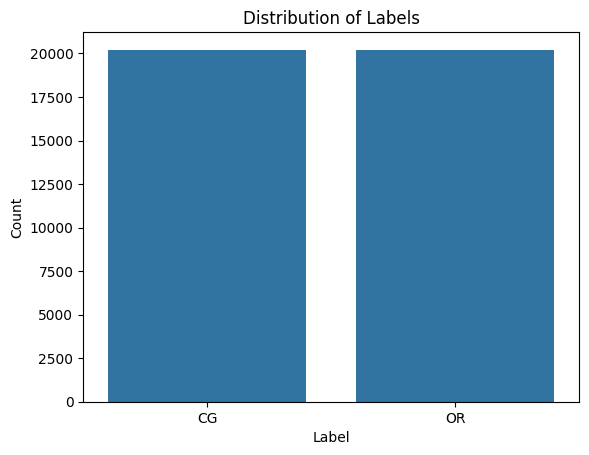

In [7]:
sns.countplot(data, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

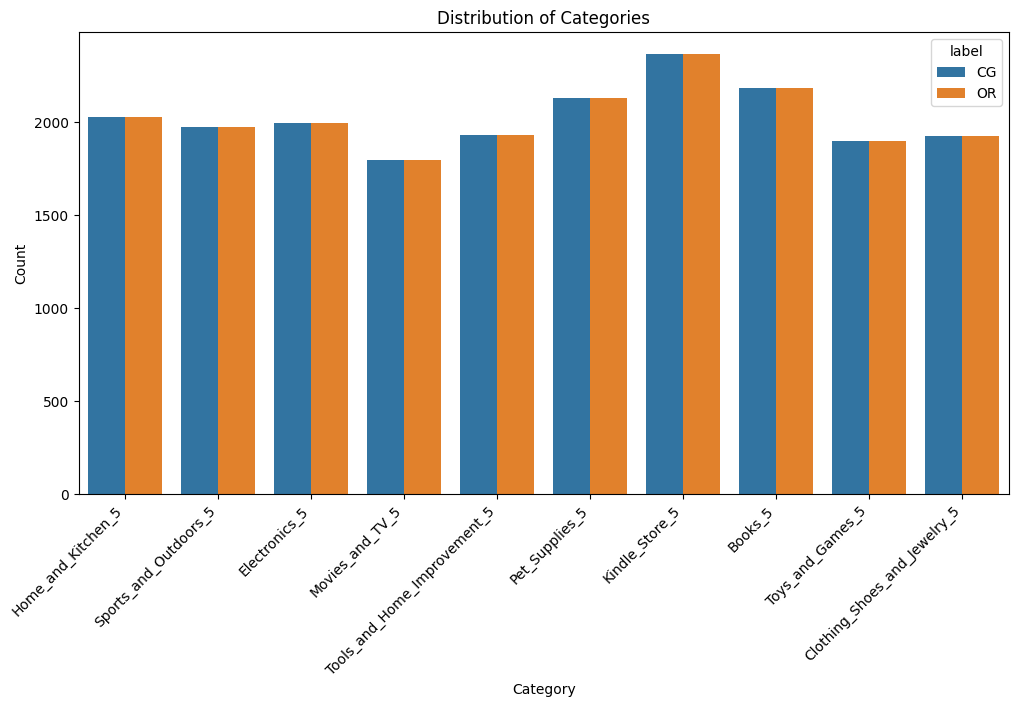

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category', hue='label')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

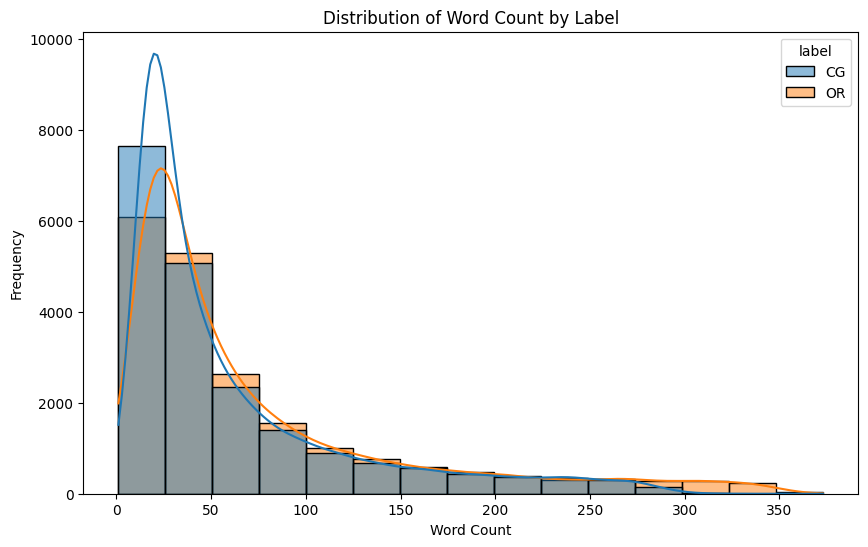

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='word_count', hue='label', kde=True, bins=15)
plt.title('Distribution of Word Count by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

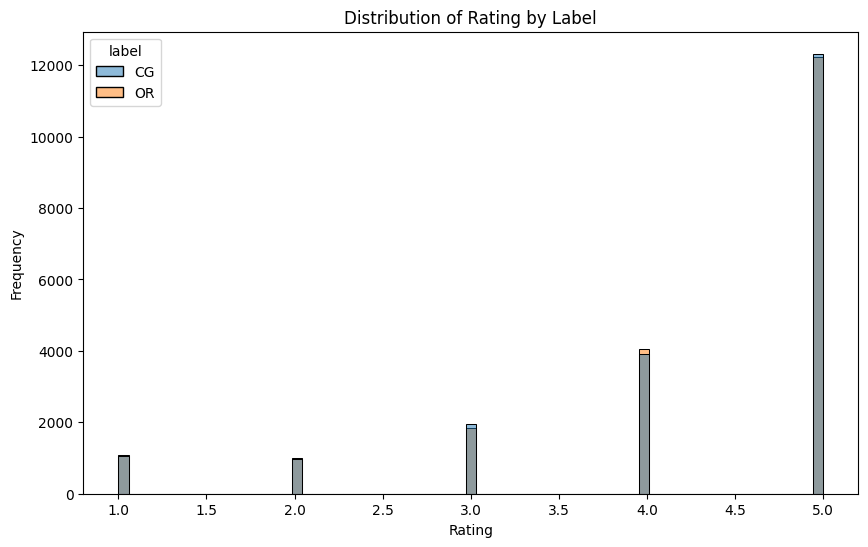

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rating', hue='label')
plt.title('Distribution of Rating by Label')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and punctuation
    return tokens

data['tokens'] = data['text_'].apply(preprocess_text)

grouped = data.groupby(['rating', 'label'])['tokens'].sum().reset_index()

def get_top_words(tokens, top_n=5):
    counter = Counter(tokens)
    return counter.most_common(top_n)

grouped['top_words'] = grouped['tokens'].apply(lambda x: get_top_words(x, top_n=5))

print(grouped[['rating', 'label', 'top_words']])

   rating label                                          top_words
0     1.0    CG  [(great, 502), (one, 443), (good, 428), (would...
1     1.0    OR  [(one, 467), (would, 368), (like, 291), (get, ...
2     2.0    CG  [(good, 487), (great, 445), (book, 438), (one,...
3     2.0    OR  [(one, 402), (would, 351), (like, 330), (book,...
4     3.0    CG  [(book, 1153), (good, 1032), (great, 1004), (s...
5     3.0    OR  [(would, 653), (one, 651), (like, 628), (book,...
6     4.0    CG  [(book, 2580), (good, 2409), (great, 2262), (s...
7     4.0    OR  [(one, 1524), (good, 1437), (like, 1394), (boo...
8     5.0    CG  [(great, 6585), (book, 5350), (good, 5085), (l...
9     5.0    OR  [(great, 4167), (one, 3820), (book, 3019), (lo...
